# Supervised Learning with Regression

**Supervised Learning ada dua jenis yaitu Algoritma Classification dan Regression**.

**Algortima Regression** adalah teknik machine learning yang digunakan untuk memprediksi nilai dari sebuah variabel target/dependen (X) berdasarkan nilai dari beberapa variabel input/independen (Y).

**Algoritma Regression** digunakan untuk membuat model matematis yang dapat digunakan untuk memprediksi nilai X dari data baru. Teknik untuk menentukan hubungan statistik antara 2 (dua) atau lebih variabel di mana perubahan variabel dependen dikaitkan dengan, dan tergantung pada, perubahan dalam satu atau lebih variabel independen.

Regresi digunakan diberbagai industri seperti :     
-  **Industri keuangan** : Memahami tren harga saham, memperkirakan harga, mengevaluasi risiko dalam domain asuransi
-  **Pemasaran (marketing)** : Memahami efektivitas kampanye pasar, perkiraan harga dan penjualan produk.
-  **Manufaktur** : Evaluasi hubungan variabel yang menentukan untuk menentukan mesin yang lebih baik untuk memberikan kinerja yang lebih baik
-  **Farmasi** : Meramalkan kombinasi obat yang berbeda untuk menyiapkan obat generik untuk penyakit.

**Jenis-jenis Analisis Regresi :**    
- **Linear Regression (Regresi Linear)**: model prediksi yang digunakan untuk mencari hubungan linier antara variabel terikat dan satu atau lebih variabel bebas.
- **Logistic Regression (Regresi Logistik)** : Teknik analisis regresi yang digunakan ketika variabel dependen bersifat diskrit. regresi logistik digunakna untuk menunjukkan hubungan antara variabel target dan variabel independen.
- **Ridge Regression (Regresi Punggungan)** : salah satu jenis regresi yang digunakan ketika ada korelasi yang tinggi antara variabel independen. Hal ini karena, dalam kasus data multikolinier, estimasi kuadrat terkecil memberikan nilai yang tidak bias.Tetapi, jika kolinearitasnya sangat tinggi, mungkin ada beberapa nilai bias, dan oleh karena itu, matriks bias diperkenalkan dalam persamaan regresi ridge.
- **Regresi Lasso** : regresi yang melakukan regularisasi beserta seleksi fitur.Sehingga dalam Machine learning, pemilihan fitur yang menggunakan regresi lasso, memungkinkan pemilihan sekumpulan fitur dari kumpulan data untuk membangun model.
- **Polynomial Regression (Regresi poliomial)** : teknik regresi yang digunakan untuk memodelkan persamaan nonlinier dengan mengambil fungsi polinomial dari variabel bebas.
- **Regresi Linear Bayesian** :  jenis regresi yang menggunakan teorema Bayes untuk mengetahui nilai koefisien regresi.


Tujuan = Membuat Model Regresi Linear untuk Memprediksi Harga Mobil

Source data = https://www.kaggle.com/datasets/imgowthamg/car-price  

## Import Library

In [3]:
pip install pandas

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Memuat Data

In [6]:
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Data Cleansing

1. Menangani Data Duplikat

In [7]:
df.duplicated().any()

False

2. Menangani Missing Value (Nilai Kosong)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

3. Mengidentifikasi Outlier

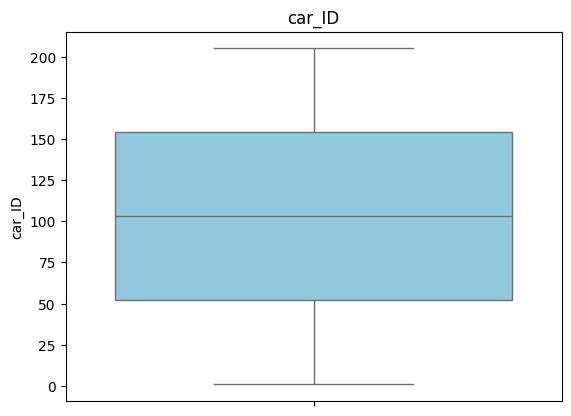

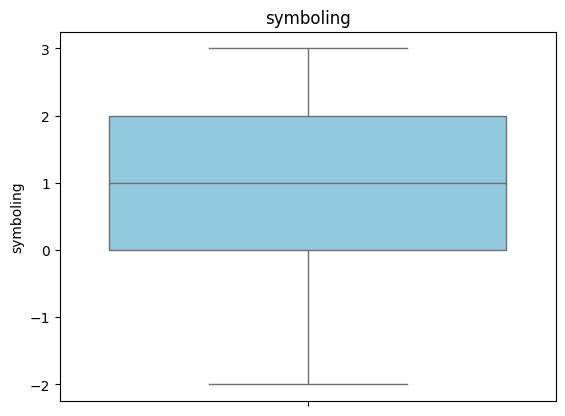

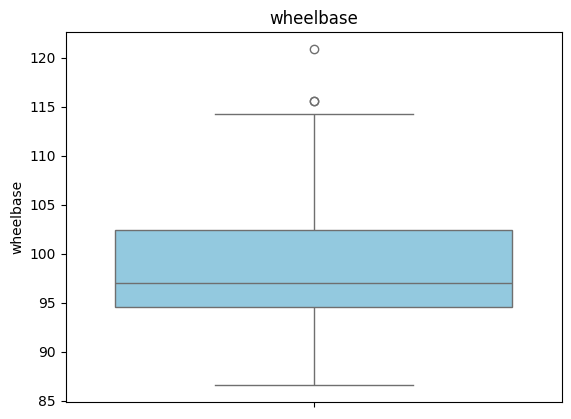

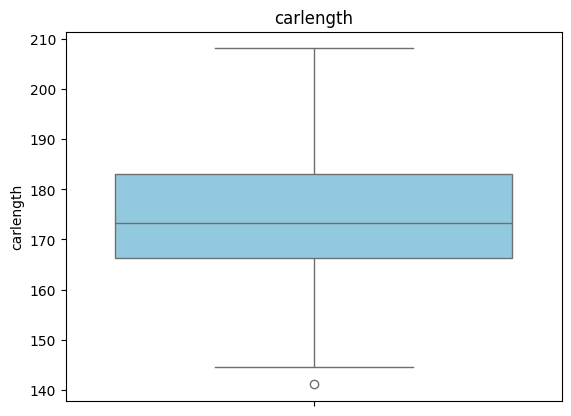

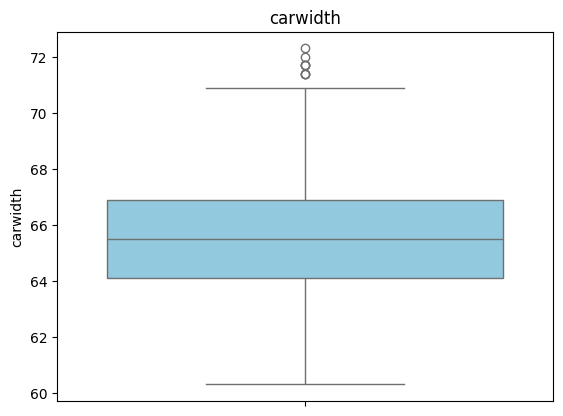

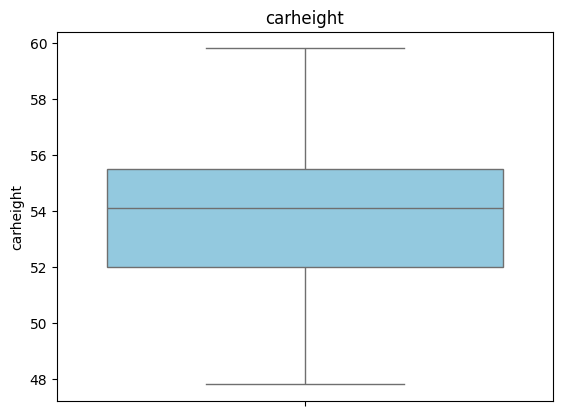

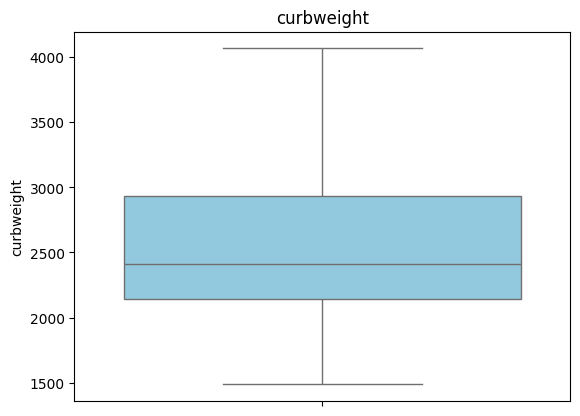

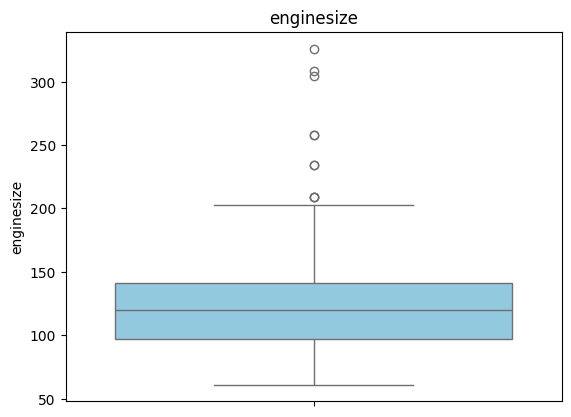

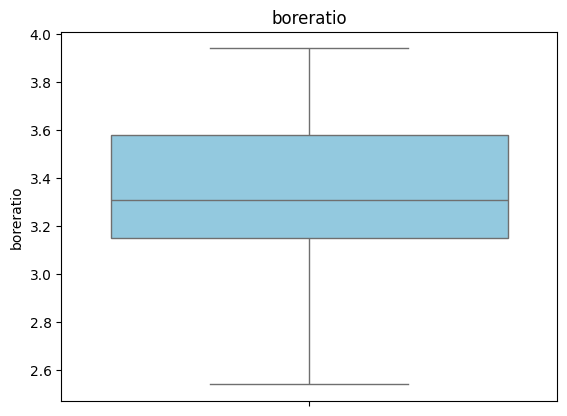

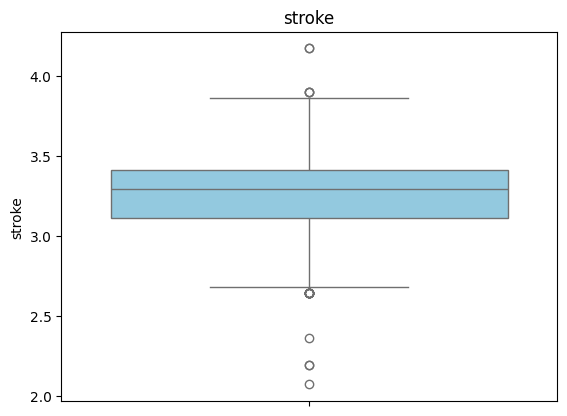

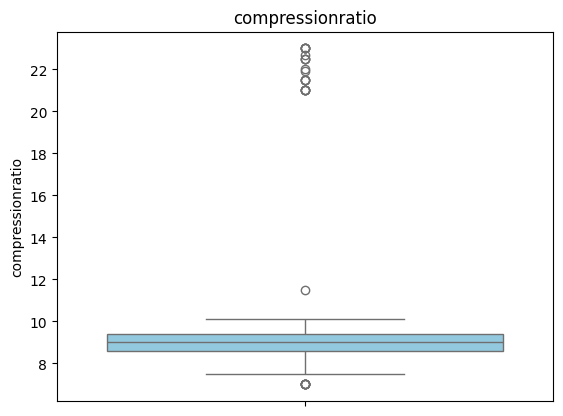

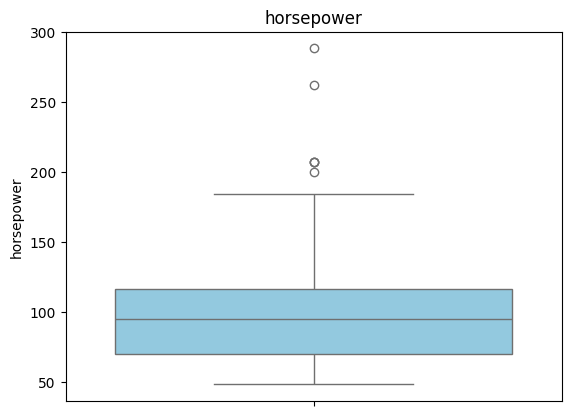

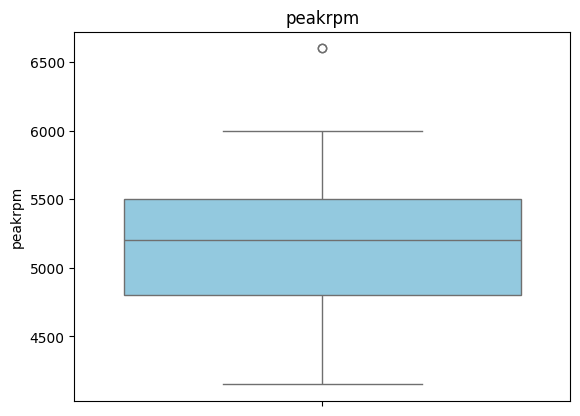

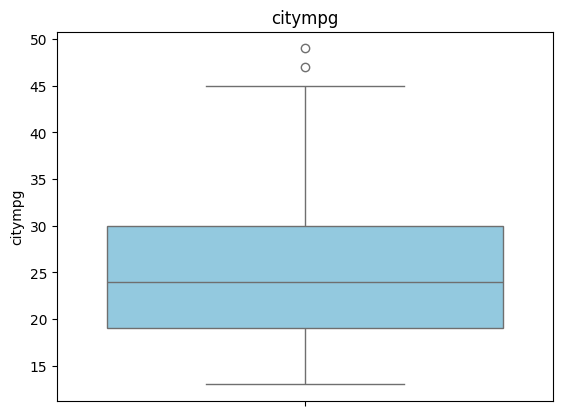

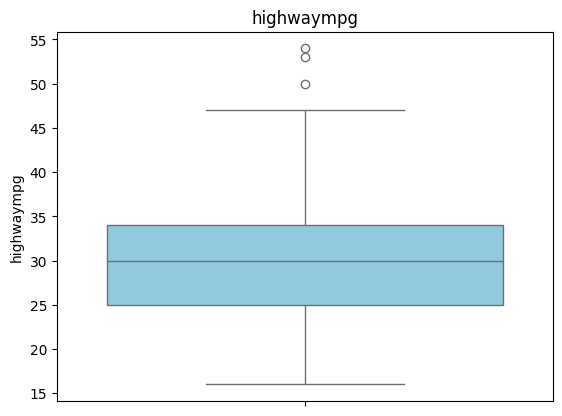

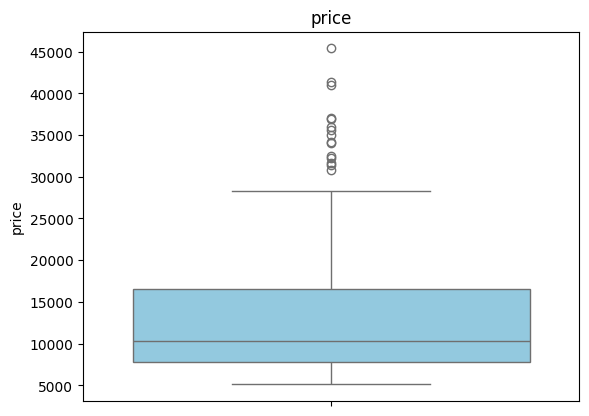

In [10]:
df1=df.select_dtypes(include=['float64', 'int64'])
for i in df1.columns:
    sns.boxplot(df1[i],color='skyblue')
    plt.title(i)
    plt.show()

Kolom yang memiliki outlier cukup jauh yaitu kolom wheellbase, carlength, carwidth, enginesize, stroke, compressionration, horsepower, peakrpm, citympg, highwaympg, price.

Kolom-kolom tersebut akan di isi dengan menggunakan nilai median dari masing-masing fitur karena median memiliki sifat robust terhadap outlier.

In [17]:
median_kolom = ['wheelbase', 'carlength', 'carwidth', 'enginesize', 'stroke',
                'compressionratio', 'horsepower', 'peakrpm', 'citympg',
                'highwaympg', 'price']

for kolom in median_kolom:
    df[kolom] = df[kolom].fillna(df[kolom].median())

## EDA (Exploratory Data Analysis)

Memilihat nilai korelari dengan plot headmap

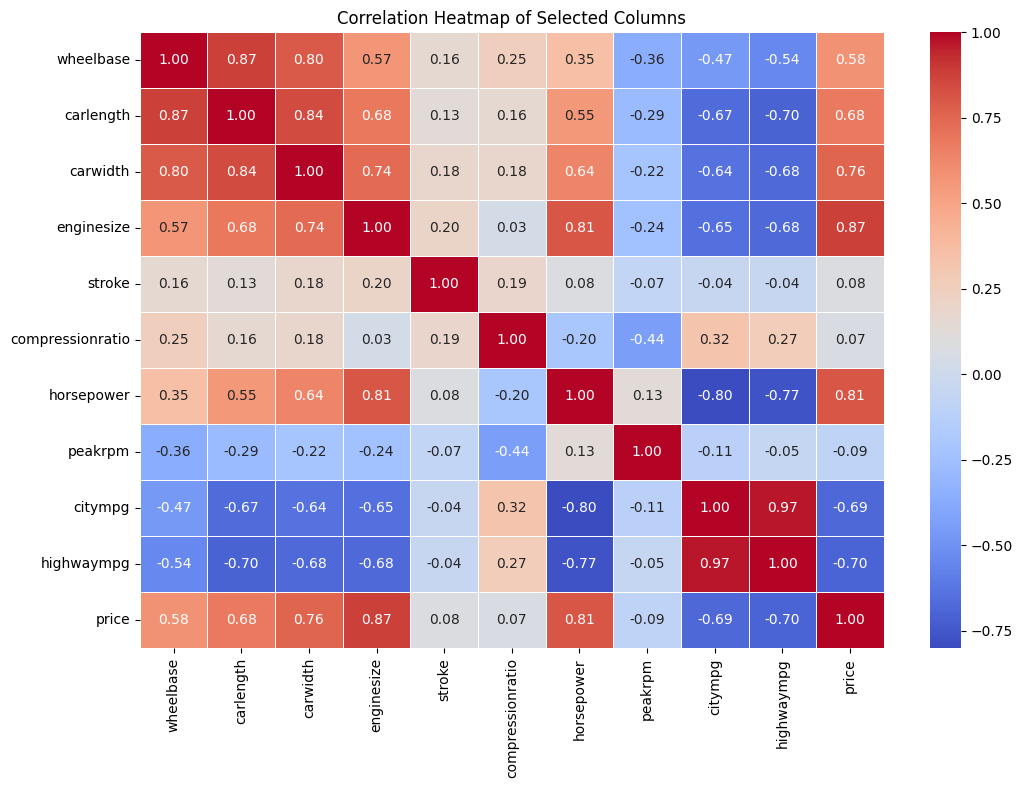

In [20]:
# menghitung korelasi
corr_matrix = df[median_kolom].corr()

# membuat headmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

Dari plot headmap diatas diambil variabel yang berkorelasi positif dengan kolom price. Sehingga diperoleh variabel-variabel yang digunakan untuk model regresi linear ini yaitu:

**Y = wheelbase, carlength, carwidth, enginesize, stroke, compressionratio, dan horespower**

## Data Preparation

1. Mengidentifikasi Numerical Coulom

In [28]:
num_cols = df.select_dtypes(include=np.number)
num_cols.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


2. Mengidentifikasi Categorical Coulom

In [24]:
cat_cols = df.select_dtypes(include='object')
cat_cols

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


3. Encode Data Categorical Coulom

**One-hot** : mengubah kolom dengan beberapa kategori menjadi kolom biner menjadi 0 dan 1.

**binary** : mengubah kolom dengan dua kategori yang dapat dikodekan menjadi 0 dan 1.

**find** : mengubah data yang kemungkinan perlu diproses atau diubah sebelum digunakan dalam analisis atau model.

In [51]:
one_hot_kolom = ['CarName', 'carbody', 'drivewheel', 'enginetype', 'fuelsystem']
binary_kolom = ['fueltype', 'aspiration', 'enginelocation']

find = ['cylindernumber',  'doornumber']

In [52]:
df['doornumber'].unique()

array([2, 4])

In [53]:
df['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8])

In [54]:
encode_find = {
    'cylindernumber':{'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8},
    'doornumber': {'two': 2, 'four': 4}
}

In [55]:
df.replace(encode_find, inplace=True)

In [56]:
#label encode
from sklearn.preprocessing import LabelEncoder

lE = LabelEncoder()

for kolom in binary_kolom:
    df[kolom] = lE.fit_transform(df[kolom])

In [42]:
#one hot encode

data = pd.get_dummies(df, columns=one_hot_kolom)

In [43]:
data.head(5)

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,1,0,2,0,88.6,168.8,64.1,48.8,...,False,False,False,False,False,False,False,True,False,False
1,2,3,1,0,2,0,88.6,168.8,64.1,48.8,...,False,False,False,False,False,False,False,True,False,False
2,3,1,1,0,2,0,94.5,171.2,65.5,52.4,...,True,False,False,False,False,False,False,True,False,False
3,4,2,1,0,4,0,99.8,176.6,66.2,54.3,...,False,False,False,False,False,False,False,True,False,False
4,5,2,1,0,4,0,99.4,176.6,66.4,54.3,...,False,False,False,False,False,False,False,True,False,False


In [63]:
data = data.replace({True:1,False:0})

## Split Train dan Test

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
#independent
x = data.drop('price', axis=1)

#dependent
y = data[['price']]

In [66]:
x

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,1,0,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,1,0,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,1,0,2,0,94.5,171.2,65.5,52.4,...,1,0,0,0,0,0,0,1,0,0
3,4,2,1,0,4,0,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,1,0,0
4,5,2,1,0,4,0,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,1,0,4,0,109.1,188.8,68.9,55.5,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,1,1,4,0,109.1,188.8,68.8,55.5,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,1,0,4,0,109.1,188.8,68.9,55.5,...,1,0,0,0,0,0,0,1,0,0
203,204,-1,0,1,4,0,109.1,188.8,68.9,55.5,...,0,0,0,0,0,1,0,0,0,0


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [68]:
x_train.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
66,67,0,0,0,4,0,104.9,175.0,66.1,54.4,...,0,0,0,0,0,1,0,0,0,0
111,112,0,1,0,4,0,107.9,186.7,68.4,56.7,...,0,0,0,0,0,0,0,1,0,0
153,154,0,1,0,4,0,95.7,169.7,63.6,59.1,...,0,0,0,1,0,0,0,0,0,0
96,97,1,1,0,4,0,94.5,165.3,63.8,54.5,...,0,0,0,1,0,0,0,0,0,0
38,39,0,1,0,2,0,96.5,167.5,65.2,53.3,...,0,0,1,0,0,0,0,0,0,0


In [69]:
y_train.head()

,price
66,18344.0
111,15580.0
153,6918.0
96,7499.0
38,9095.0


## Membuat Model Regresi Linear

In [70]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

## Evaluasi Model

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [76]:
pred = regressor.predict(x_test)

In [77]:
print('MAE dari Multiple Linear Regression :', mean_absolute_error(y_test, pred))
print('RMSE dari Multiple Linear Regression :', np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('R2 score:', r2)

MAE dari Multiple Linear Regression : 8842.831663299405
RMSE dari Multiple Linear Regression : 13924.024491024828
R2 score: -1.4558979371244298
